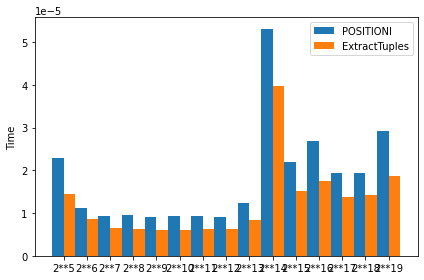

In [7]:
from pygraphblas import *
import random
from time import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

mtimes = []
atimes = []
btimes = []
labels = []
for i in range(5, 20):
    random.seed(42)
    labels.append(f'2**{i}')
    M = Matrix.random(FP64, GxB_INDEX_MAX, GxB_INDEX_MAX, 2**i)
    w = Vector.sparse(FP64)
    v = Vector.sparse(INT64)
    
    tic = time()
    M.reduce_vector(out=w)
    w.select('max', out=w)
    mtimes.append(time() - tic)
    
    tic = time()
    w.apply(INT64.POSITIONI, out=v)
    a = [v.reduce_int(INT64.ANY_MONOID)]
    atimes.append(time() - tic)
    
    tic = time()
    b = list(w.I)
    btimes.append(time() - tic)
    assert a == b

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, mtimes, width, label='MAX')
rects2 = ax.bar(x - width/2, atimes, width, label='POSITIONI')
rects3 = ax.bar(x + width/2, btimes, width, label='ExtractTuples')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
